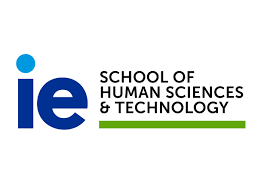

# Titanic Dataset

# Sections
* [Introduction](#0)
* [Part I: Basic exploratory analysis](#1)
  * [Question 1](#1.1)  
  * [Question 2](#1.2)
  * [Question 3](#1.3)
  * [Question 4](#1.4)
  * [Question 5](#1.5)
* [Part II: Insights](#2)
  * [Insight 1](#2.1)
  * [Insight 2](#2.2)
  * [Insight 3](#2.3)
* [Part III: Imputation](#3)
  * [Method 1](#3.1)
  * [Method 2](#3.1)

<a id='0'></a>
## Introduction
<p>
<div>The goal of this assignment is to analyze and extract insights from a database with information from the passengers of the Titanic. The dataset contains the following columns:</div>
<ul>    
    <li>PassengerId: unique ID of the passenger</li>
    <li>Survived: Tells if the passenger survived (0 - No, 1 - Yes)</li>
    <li>Pclass: passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)</li>
    <li>Name: name of the passenger</li>
    <li>Sex: male/female</li>
    <li>Age: passenger age in years</li>
    <li>SibSp: No of siblings/spouses aboard</li>
    <li>Parch: No of parents/children aboard</li>
    <li>Ticket: ticket number</li>
    <li>Fare: passenger fare</li>
    <li>Cabin: cabin number</li>
    <li>Embarked: port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)</li>
</ul>    
</p>

Here is the dataset ***titanic.csv*** that we just described:

In [290]:
import pandas as pd
df = pd.read_csv("data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


<a id='1'></a>
## Part I: Basic exploratory analysis

In this section, we are going to do some data exploration and answer the question asked. 

The first thing we might think about is setting the column *PassengerId* as the actual index of the dataframe.

In [291]:
df = df.set_index("PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In this case, we are not going to do this because having the PassengerId as a column will allow us to use it for some operations and increase the versatility of the dataset.

Moreover, using the default *RangeIndex* may improve computational speed. See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.RangeIndex.html for more information.

For these two reasons, we are going to maintain the index as it is by default.

In [292]:
df = pd.read_csv("data/titanic.csv")

<a id='1.1'></a>
### Question 1

Read the dataset correctly using pandas, using an appropriate column as index. What is the PassengerId of "Mr. Robert William Norman"?

In [293]:
df.loc[df["Name"]=="Mr. Robert William Norman", ["Name", "PassengerId"]]

,Name,PassengerId
234,Mr. Robert William Norman,235


<a id='1.2'></a>
### Question 2

Compute the percentage of survivors out of total number of passengers and the percentage of men and women out of total number of passengers.

In [294]:
#Total percentage of survivors out of the total
#Since the Survived column is a categorical of 1 and 0, we can use the mean to calculate the probability of surviving
print("Total percentage of survivors: ", df["Survived"].mean())

Total percentage of survivors:  0.3838383838383838


In [295]:
#Percentage of men
print("Percentage of male passengers: ", df.loc[df["Sex"] == "male"]["PassengerId"].count() / df.shape[0])
#Percentage of women
print("Percentage of female passengers: ", df.loc[df["Sex"] == "female"]["PassengerId"].count() / df.shape[0])

Percentage of male passengers:  0.6475869809203143
Percentage of female passengers:  0.35241301907968575


<a id='1.3'></a>
### Question 3

Compute the percentage of survivors by sex (i.e. the percentage of male passengers that survived and female passengers that survived) and the sex distribution of survivors (i.e. percentage of survivors that were men and percentage of survivors that were women).

In [296]:
#Percentage of survivors by sex
#We can use mean() for the percentage since column Survived is either 0 or 1
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [297]:
#Distribution of survivors by sex
df.loc[df["Survived"] == 1].groupby('Sex')["PassengerId"].count() / df.loc[df["Survived"] == 1].shape[0]

Sex
female    0.681287
male      0.318713
Name: PassengerId, dtype: float64

<a id='1.4'></a>
### Question 4

Display in a 2 x 2 DataFrame the probability of being male/female and surviving/not surviving.

In order to do this question, we are going to use the function ***pd.crosstab*** which allows us to create a simple cross tabulation of two (or more) factors. In this case it is going to be the *Sex* and *Survived*

In [298]:
#First we create a frequency table
survived_sex_freq_table = pd.crosstab(index = df["Sex"], columns = df["Survived"])
survived_sex_freq_table

Survived,0,1
Sex,,
female,81,233
male,468,109


In [299]:
#We divided by the count of passengers to obtain the probabilities
survived_sex_probabilities = survived_sex_freq_table / df.shape[0]
survived_sex_probabilities

Survived,0,1
Sex,,
female,0.090909,0.261504
male,0.525253,0.122334


In [300]:
#Display using to_string() to copy paste the output more easily
survived_sex_probabilities.to_string()

'Survived         0         1\nSex                         \nfemale    0.090909  0.261504\nmale      0.525253  0.122334'

<a id='1.5'></a>
### Question 5

Display in a DataFrame the probability of survival/not survival of all combinations of sex and class.

In [301]:
#First we create a frequency table
survived_sex_class_freq_table = pd.crosstab(index = [df["Sex"], df["Pclass"]], columns = df["Survived"])
survived_sex_class_freq_table

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

In [302]:
#We divided by the count of passengers to obtain the probabilities
survived_sex_class_probabilities = survived_sex_class_freq_table / df.shape[0]
survived_sex_class_probabilities

Survived              0         1
Sex    Pclass                    
female 1       0.003367  0.102132
       2       0.006734  0.078563
       3       0.080808  0.080808
male   1       0.086420  0.050505
       2       0.102132  0.019080
       3       0.336700  0.052750

In [303]:
#Display using to_string()
survived_sex_class_probabilities.to_string()

'Survived              0         1\nSex    Pclass                    \nfemale 1       0.003367  0.102132\n       2       0.006734  0.078563\n       3       0.080808  0.080808\nmale   1       0.086420  0.050505\n       2       0.102132  0.019080\n       3       0.336700  0.052750'

<a id='2'></a>
## Part II: Insights

Present **three insights** about the dataset, each of them relating at least 3 different variables, and support them by code and numbers.

<a id='2.1'></a>
###  Insight 1

For the first insight, we are going to display the percentage of tickets for each class that have been bought for each port.

The first thing we need to realize is that, it seems that there are groups of people that have the same ticket number. This can be shown by doing a groupby *Ticket* and checking the count:

In [304]:
df.groupby("Ticket")["PassengerId"].count().head()

Ticket
110152    3
110413    3
110465    2
110564    1
110813    1
Name: PassengerId, dtype: int64

Taking this into consideration, we are going to consider them as just one ticket purchased. For this reason, we are going to use *nunique* to apply this rule

Having this knowledge, to provide the percentage of tickets for each class that have been bought for each port, we can create a pivot table using *Embarked* and *Pclass* as our index.

In [305]:
df.pivot_table(index = ["Embarked", "Pclass"], values = "Ticket", aggfunc = "nunique") / df["Ticket"].nunique()

Ticket
Embarked Pclass          
C        1       0.083700
         2       0.017621
         3       0.077827
Q        1       0.001468
         2       0.004405
         3       0.091043
S        1       0.132159
         2       0.183554
         3       0.409692

It can be seen that Southampton (S) is the port where most people embarked for all classes.

In Cherbourg (C) the highest percentage of people that embarked are first class.

In Queensland (Q), on the contrary, it has a highest percentage of third class.

<a id='2.2'></a>
###  Insight 2

For the second insight, we are going to display the probability that a male has to survive depending on the number of siblings/spouses they have aboard. This is interesting taking into consideration that males are much more likely to not survived (as seen in question 4 of the previous section).

To display these probabilities we are going to use again the *pd.crosstab*.

In [306]:
#First we create a frequency table
male_sibsp_crosstab = pd.crosstab(index = [df.loc[df["Sex"] == "male", "Sex"], df.loc[df["Sex"] == "male", "SibSp"]], columns = df["Survived"])
male_sibsp_crosstab

Survived      0   1
Sex  SibSp         
male 0      361  73
     1       71  32
     2       12   3
     3        5   0
     4       11   1
     5        4   0
     8        4   0

Once we have the frequency table, we are going to add a new column that will have the odds of males surviving depending on the number of siblings/spouses.

In [307]:
male_sibsp_crosstab["odds"] = male_sibsp_crosstab[1] / male_sibsp_crosstab[0]
male_sibsp_crosstab

Survived      0   1      odds
Sex  SibSp                   
male 0      361  73  0.202216
     1       71  32  0.450704
     2       12   3  0.250000
     3        5   0  0.000000
     4       11   1  0.090909
     5        4   0  0.000000
     8        4   0  0.000000

It can be seen that the odds of surviving for men when having 2 or more siblings/spouses decreases substantially. It is also interesting to note that having just one sibling/spouse greatly increases the males odds of surviving. 

<a id='2.3'></a>
###  Insight 3

For the final and third insight, we are going to compare the surviving probabilities of kids vs surviving probabilities of adults by passenger class. We are going to consider kids when the passenger is 12 or less years old. 

First we are going to compute the probabilities of the kids.

In [308]:
df_kids_under_12 = df.loc[df["Age"] <= 12]
df_kids_under_12.pivot_table(index = ["Pclass"] , values = "Survived", aggfunc = "sum") / \
df_kids_under_12.pivot_table(index = ["Pclass"] , values = "Survived", aggfunc = "count")

,Survived
Pclass,
1,0.750000
2,1.000000
3,0.416667


Second the probability of the adults.

In [309]:
df_over_12 = df.loc[df["Age"] > 12]
df_over_12.pivot_table(index = ["Pclass"] , values = "Survived", aggfunc = "sum") / \
df_over_12.pivot_table(index = ["Pclass"] , values = "Survived", aggfunc = "count")

,Survived
Pclass,
1,0.653846
2,0.423077
3,0.211726


We can see that the rule of kids and women first seems correctly applied since the percentage of kids that survived is higher than the adults in all classes. However, it seems that it was not evenly distributed since the percentage of child survivors in third class is much lower than first and second class.

<a id='3'></a>
## Part III: Imputation

Devise **two distinct strategies** to impute the missing values in the *Age* column.

(You cannot use machine learning algorithms for the feature engineering part, only manual techniques. This rules out KNN, Deep Learning, sklearn.preprocessing.Imputer, fancyimpute, missingno, and similar)

<a id='3.1'></a>
###  Method 1

For the first method, we realized that all the names of the passenger have a title associated to them (e.g. Mr, Miss, Rev). The first thing we are going to do is to create a new column with these titles.

In [310]:
df["title"]=df["Name"].str.split(".").str[0]
titles = df["title"].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

The titles are interesting because they have a direct assocation with the age of the passenger. Taking this into consideration, it is an interesting variable that we can use to impute the age of the passengers.

In combination with these titles, we are going to use the class of the passengers. It is also interesting because it seems that people in first class are older than people in lower classes.

In [311]:
classes=df['Pclass'].unique()
classes

array([3, 1, 2], dtype=int64)

With all this information, we are going to impute the mean age of the passengers by title and class.

In [312]:
title_class=df.groupby(["title","Pclass"])["Age"].mean()
title_class.head()

title  Pclass
Capt   1         70.00
Col    1         58.00
Don    1         40.00
Dr     1         43.75
       2         38.50
Name: Age, dtype: float64

Once we have this information, we can loop to impute the NaN values of the age by using the mean age by title and class we have calculated before.

In [313]:
#Loop in titles and classes
for title in titles:
    for pclass in classes:
        #Check the rows of the data frame that have the combination of title and class
        filt=((df['title']==title) & (df['Pclass']==pclass))
        if filt.any()==True:
            #Impute the values by using the mean calculated for that pair of title and class
            mean_values=title_class.loc[title,pclass]
            df['Age'].fillna(mean_values,inplace=True)

Once all the values have been imputed, we can check that now there is no NaN values on the column *Age*.

In [314]:
(df['Age'].isna()).value_counts()

False    891
Name: Age, dtype: int64

<a id='3.2'></a>
###  Method 2



For the second method, we wanted to explore different variables other than *title* and *Pclass*. To do so, we thought about using a correlation matrix and checking what variables correlate with *Age*.

Firstly, we are going to reset the dataframe so that we can apply this second method.

In [315]:
df = pd.read_csv("data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


Then, we are going to check the correlation matrix to find the variables that have a higher correlation with the *Age*.

In [316]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


By analyzing the correlation matrix, we can see that the variable with the higher correlation to *Age* is ***SibSp*** (excluding *Pclass* which was used for method 1). For this reason, we are going to calculate the mean age by *SibSp*.

In [317]:
means=df.groupby('SibSp')['Age'].mean()
means

SibSp
0    31.397558
1    30.089727
2    22.620000
3    13.916667
4     7.055556
5    10.200000
8          NaN
Name: Age, dtype: float64

In the same way as we did before, we are going to loop over the dataframe to impute the NaN values depending on the SibSp. 

In [318]:
for i in df['SibSp']:
    mean_value=means.loc[i]
    df['Age'].fillna(mean_value,inplace=True)

To check that it has worked correctly, we are going to see if there are still NaN values on the *Age* after the imputation.

In [319]:
(df['Age'].isna()).value_counts()

False    891
Name: Age, dtype: int64